In [1]:
from scipy.integrate import quad
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import os
%matplotlib inline

In [2]:
def load_file_paths(base_dir):
    file_paths = []
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file == "chemical_and_SN_evolution.txt":
                file_paths.append(os.path.join(root, file))
    return file_paths

def load_data_with_names(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    data_dict = {}
    for i in range(len(lines)):
        line = lines[i].strip()
        if line.startswith("#"):
            row_name = line[1:].strip()
            if i + 1 < len(lines):
                data = list(map(float, lines[i + 1].strip().split()))
                data_dict[row_name] = data
    return data_dict

def recalculate(logNO, logOH): # Recalculate logNO and logOH
    logNO = [i - 0.86 for i in logNO]
    logOH = [i + 8.696 for i in logOH]
    return logNO, logOH

def fit(logOH, logNO): # Fit a polynomial to the data
    coefficients = np.polyfit(logOH, logNO, deg=6)
    polynomial = np.poly1d(coefficients)
    smooth_logOH = np.linspace(min(logOH[6:]), max(logOH[6:]), 500)
    smooth_logNO = polynomial(smooth_logOH)
    return smooth_logOH, smooth_logNO

def prepare_data(file_paths):
    for path in file_paths:
        data = load_data_with_names(path)
        logNO, logOH = data['Gas [N/O]:'], data['Gas [O/H]:']
        FeH, MgH, OH = data['Gas [Fe/H]:'], data['Gas [Mg/H]:'], data['Gas [O/H]:']
        timestep = data['time step list:']
        logNO_rec, logOH_rec = recalculate(logNO, logOH)
        smooth_logOH, smooth_logNO = fit(logOH_rec, logNO_rec)
    return smooth_logOH, smooth_logNO

def plot_high_redshift_gal_data():
    # Define data points: (x, y, label, color)
    cmap = plt.get_cmap('tab20')
    points = [
        (8.36, -1.43, 'Mrk 996 (low density)', cmap(1), 0.07, 0.14),
        (8.03, -0.21, 'LyC', cmap(2), 0.06, 0.11),
        (8.00, -0.88, 'ID150880', cmap(4), 0.10, 0.15),
        ((7.15+7.67)/2, 0.20, 'UNCOvER-45924', cmap(5), 7.67-((7.15+7.67)/2), 0.06),
        (8.26, -0.93, 'ID1665', cmap(6), 0.15, 0.15),
        (7.92, -0.85, 'ID1746', cmap(7), 0.13, 0.15),
        (7.72, -0.62, 'ID1477', cmap(8), 0.09, 0.11),
        (7.75, -0.76, 'ID60001', cmap(9), 0.03, 0.03),
        (7.97, -0.86, 'EXCELS-121806', cmap(10), 0.04, 0.10),
        (7.90, -1.10, 'GS_3073 (low density)', cmap(12), 0.09, 0.12),
        (7.59, -0.85, 'GS_9422 (tentative)', cmap(13), 0.06, 0),
        (7.96, -0.67, 'ID397', cmap(14), 0.10, 0.14),
        (7.43, -0.39, 'RXJ2248-ID', cmap(15), 0.17, 0.10),
        (7.65, -0.40, 'GLASS_150008', cmap(16), 0.12, 0.08),
        (7.47, -0.6, 'A1703-zdk6', cmap(17), 0.19, 0.3),
        (7.85, -0.44, 'GN-z8-LAE', cmap(18), 0.17, 0.36),
        (8.37, -0.01, 'CEERS_01019 (AGN)', cmap(19), 0.13, 0),
        (7.38, -0.59, 'GN-z9p4', cmap(0), 0.15, 0.24),
        (7.49, -0.93, 'GS-z9-0', cmap(11), 0.11, 0.37),
        ((6.69+7.69)/2, (-0.08-0.12)/2, 'GHZ9p', cmap(3), 0, 0),
        # (7.44, -0.25, 'GHZ2r', cmap(4), 0.26, 0.05)
    ]

    handles = []
    for x, y, label, color, xerr, yerr in points:
        sc = plt.scatter(x, y, color=color, label=label, s=20, marker='1', zorder=3)
        plt.errorbar(x, y, xerr=[xerr] if isinstance(xerr, float) else [xerr], yerr=yerr, fmt='none', elinewidth=0.8, ecolor=color, zorder=2)
        handles.append(sc)
    # Custom legend
    lgd = plt.legend(handles=handles, labels=[p[2] for p in points], bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=8, title="Observational Data")
    return lgd

def plot_Bekki_comparison():
    patha115 = "./Bekki paper stolen plots/alpha115.csv"
    patha155 = "./Bekki paper stolen plots/alpha155.csv"
    patha235 = "./Bekki paper stolen plots/alpha235.csv"
    pathdwarf = "./Bekki paper stolen plots/dwarf.csv"

    a115 = np.loadtxt(patha115, delimiter=',')
    a155 = np.loadtxt(patha155, delimiter=',')
    a235 = np.loadtxt(patha235, delimiter=',')
    dwarf = np.loadtxt(pathdwarf, delimiter=',')

    BlogOHa115 = a115[:, 0]
    BlogNOa115 = a115[:, 1]
    BlogOHa155 = a155[:, 0]
    BlogNOa155 = a155[:, 1]
    BlogOHa235 = a235[:, 0]
    BlogNOa235 = a235[:, 1]
    BlogOHdwarf = dwarf[:, 0]
    BlogNOdwarf = dwarf[:, 1] 

    # plt.rc('font', family='serif')
    plt.plot(BlogOHa155, BlogNOa155, color='palevioletred', lw=1, label='Bekki, $\\alpha=1.55$', linestyle=':')
    plt.plot(BlogOHa115, BlogNOa115, color='deeppink', lw=0.6, label='Bekki et al. 2023, $\\alpha=1.15$', linestyle='-.')
    # plt.plot(BlogOHa235, BlogNOa235, color='crimson', lw=1, label='Bekki, $\\alpha=2.35$', linestyle='--')
    # plt.plot(BlogOHdwarf, BlogNOdwarf, color='darkmagenta', lw=1, label='Bekki, dwarf', linestyle='-.')
    xmin, xmax = 7.62, 8.02
    ymin, ymax = -0.25, 0.25
    rect = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin,
                        linewidth=2, edgecolor='purple', facecolor='none', linestyle=':', zorder=2)
    plt.gca().add_patch(rect)
    # plt.plot([7.82, 7.92], [-0.25, 0.25], color='purple', linestyle=':', linewidth=2, marker=None)
    plt.text(7.82, - 0.25 + 0.1, 'GN-z11', color='purple', ha='center', va='bottom', fontsize=10, rotation=90)
    # plt.scatter(7.84, -0.38, color='black', label='GN-z11', s=30, marker='*') # from Senchyna23 https://arxiv.org/pdf/2303.04179 (gas + dust)
    plt.scatter(7.71, -0.25, color='black', label='GN-z11', s=30, marker='*') # gas-phase only (Senchyna23)
    plt.errorbar(7.71, -0.25, 0.05, 0.05, fmt='none', elinewidth=0.8, ecolor='black', zorder=2)
    plt.scatter(8.696, -0.86, color='purple', label='Solar values', s=20, marker='*')
    #plt.scatter(7.91, -0.2, color='red', label='GN-z11', s=30, marker='*')

def plot_evolution_track_difference(file_paths, index_x, index_y):
    assert len(file_paths) == 2 

    # Load and recalculate both yields
    data1 = load_data_with_names(file_paths[0])
    data2 = load_data_with_names(file_paths[1])
    logNO1, logOH1 = recalculate(data1['Gas [N/O]:'], data1['Gas [O/H]:'])
    logNO2, logOH2 = recalculate(data2['Gas [N/O]:'], data2['Gas [O/H]:'])

    # Restrict to desired range
    logNO1 = logNO1[index_x:index_y]
    logOH1 = logOH1[index_x:index_y]
    logNO2 = logNO2[index_x:index_y]
    logOH2 = logOH2[index_x:index_y]

    # Interpolate logNO2 onto logOH1 grid
    from scipy.interpolate import interp1d
    interp_NO2 = interp1d(logOH2, logNO2, bounds_error=False, fill_value='extrapolate')
    logNO2_interp = interp_NO2(logOH1)

    # Compute difference
    diff = np.array(logNO1) - np.array(logNO2_interp)

    # Plot
    plt.plot(logOH1, diff, color='black', lw=1.5, label='Kob16-LC18')
    plt.axhline(0, color='gray', lw=0.8, linestyle='--')
##########
# simulation data colour coded

# def plot_NO_OH_comparison(file_paths, labels, index_x, index_y, title, filename, evolution_track_difference=True):  
#     colours = colors = plt.get_cmap('tab10').colors  # Extend if needed
#     plt.rc('font', family='serif')
#     plt.figure(figsize=(8, 6))
#     scatter = None
#     colors = plt.get_cmap('viridis')
#     for i, path in enumerate(file_paths):
#         data = load_data_with_names(path)
#         logNO, logOH = data['Gas [N/O]:'], data['Gas [O/H]:']
#         time_steps = data['time step list:']
#         stellar_ages = np.log10(time_steps)
#         logNO, logOH = recalculate(logNO, logOH)
#         # smooth_logOH, smooth_logNO = fit(logOH, logNO)
#         label = labels[i] if labels and i < len(labels) else f"Run {i+1}"
#         # plt.plot(smooth_logOH[index_x:index_y], smooth_logNO[index_x:index_y], color=colors[i % len(colors)], lw=0.8, label=label)
#         norm = plt.Normalize(vmin=min(stellar_ages), vmax=max(stellar_ages))
#         colors_mapped = colors(norm(stellar_ages[index_x:index_y]))
#         scatter = plt.scatter(logOH[index_x:index_y], logNO[index_x:index_y], c=colors_mapped, cmap='viridis', s=20, label=label)
#         plt.plot(logOH[index_x:index_y], logNO[index_x:index_y], color=colours[i % len(colours)], lw=0.8, label=label)
#     if scatter:
#         plt.colorbar(scatter, label='log Stellar Age (Gyr)', orientation='vertical')
#     plot_Bekki_comparison()
#     plt.xlabel('12+log(O/H)', fontsize=14)
#     plt.ylabel('log(N/O)', fontsize=14)
#     plt.title(title, fontsize=12)
#     #lgd2 = plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
#     lgd2 = plt.legend(bbox_to_anchor=(-0.15, 0.5), loc='center right', fontsize=8, borderaxespad=0)
#     plt.gca().add_artist(lgd2)
#     # lgd_obs = plot_high_redshift_gal_data()
#     # plt.gca().add_artist(lgd_obs)
#     plot_high_redshift_gal_data()
#     #plt.savefig(filename, bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi=300)
#     plt.tight_layout()
#     plt.show()
##########

def plot_NO_OH_comparison(file_paths, labels, index_x, index_y, title, filename, evolution_track_difference=True):  
    colours = colors = plt.get_cmap('tab10').colors  # Extend if needed
    plt.rc('font', family='serif')
    plt.figure(figsize=(8, 6))
    for i, path in enumerate(file_paths):
        data = load_data_with_names(path)
        logNO, logOH = data['Gas [N/O]:'], data['Gas [O/H]:']
        time_steps = data['time step list:']
        stellar_ages = np.log10(time_steps)
        logNO, logOH = recalculate(logNO, logOH)
        # smooth_logOH, smooth_logNO = fit(logOH, logNO)
        label = labels[i] if labels and i < len(labels) else f"Run {i+1}"
        # plt.plot(smooth_logOH[index_x:index_y], smooth_logNO[index_x:index_y], color=colors[i % len(colors)], lw=0.8, label=label)
        plt.scatter(logOH[index_x:index_y], logNO[index_x:index_y], color=colours[i % len(colours)], s=20, label=label)
        plt.plot(logOH[index_x:index_y], logNO[index_x:index_y], color=colours[i % len(colours)], lw=0.8)
    plot_Bekki_comparison()
    plt.xlabel('12+log(O/H)', fontsize=14)
    plt.ylabel('log(N/O)', fontsize=14)
    plt.title(title, fontsize=12)
    #lgd2 = plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
    lgd2 = plt.legend(bbox_to_anchor=(1.01, 0.2), loc='upper left', fontsize=8, title="Simulation Data")
    plt.gca().add_artist(lgd2)
    # lgd_obs = plot_high_redshift_gal_data()
    # plt.gca().add_artist(lgd_obs)
    plot_high_redshift_gal_data()
    plt.savefig(filename, bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi=300)
    plt.tight_layout()
    plt.show()

['./simulation_results_from_galaxy_evol/reproduction/imfKroupaSTF0.04alpha2.35Log_SFR1.0SFEN60SFE0.001Z_0-4.15/chemical_and_SN_evolution.txt', './simulation_results_from_galaxy_evol/reproduction/imfKroupaSTF0.04alpha2.35Log_SFR1.0SFEN60SFE0.0009Z_0-4.15/chemical_and_SN_evolution.txt']


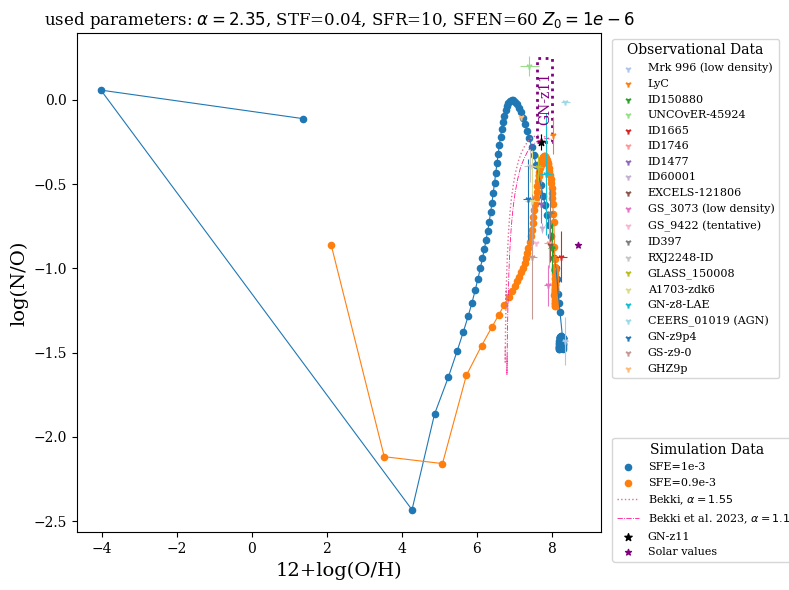

In [13]:
file_paths = glob.glob("./simulation_results_from_galaxy_evol/reproduction/imfKroupaSTF0.04alpha2.35Log_SFR1.0SFEN60SFE*Z_0-4.15/chemical_and_SN_evolution.txt")
print(file_paths)
labels = ['SFE=1e-3', 'SFE=0.9e-3']
plot_NO_OH_comparison(
    file_paths,
    labels=labels,
    index_x=1,
    index_y=300,
    title='used parameters: $\\alpha=2.35$, STF=0.04, SFR=10, SFEN=60 $Z_0=1e-6$',
    filename='./figs/galevo/reproduction_of_bekki_alpha2-35_SNia_ON.png',
    evolution_track_difference=None,
)
#a lot of gas in galaxy, contribution from stars is less significant so we need stronger outflow to reach such high N/O
#a bit problematic solution, because such strong galactic wind might not be realistic


#wrong yields!! prepared from read_yield_table.py -- old!

['./simulation_results_from_galaxy_evol/reproduction/imfKroupaSTF0.04alpha2.35Log_SFR1.0SFEN60SFE0.0009Z_0-4.15/chemical_and_SN_evolution.txt']


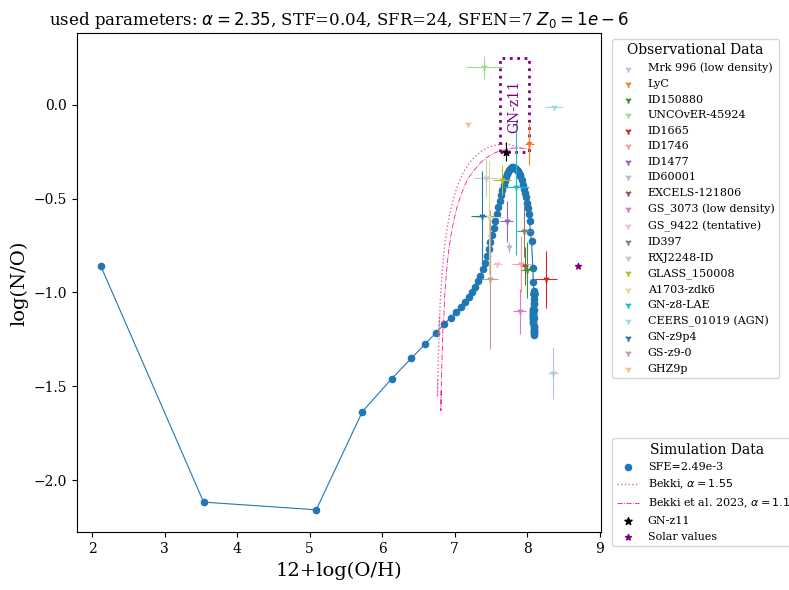

In [14]:
file_paths = glob.glob("./simulation_results_from_galaxy_evol/reproduction/imfKroupaSTF0.04alpha2.35Log_SFR1.0SFEN60SFE0.0009Z_0-4.15/chemical_and_SN_evolution.txt")
print(file_paths)
labels = ['SFE=2.49e-3']
plot_NO_OH_comparison(
    file_paths,
    labels=labels,
    index_x=1,
    index_y=300,
    title='used parameters: $\\alpha=2.35$, STF=0.04, SFR=24, SFEN=7 $Z_0=1e-6$',
    filename='./figs/galevo/reproduction_of_bekki_alpha1-15_SNia_ON.png',
    evolution_track_difference=None,
)

#wrong yields!! prepared from read_yield_table.py -- old!

[]


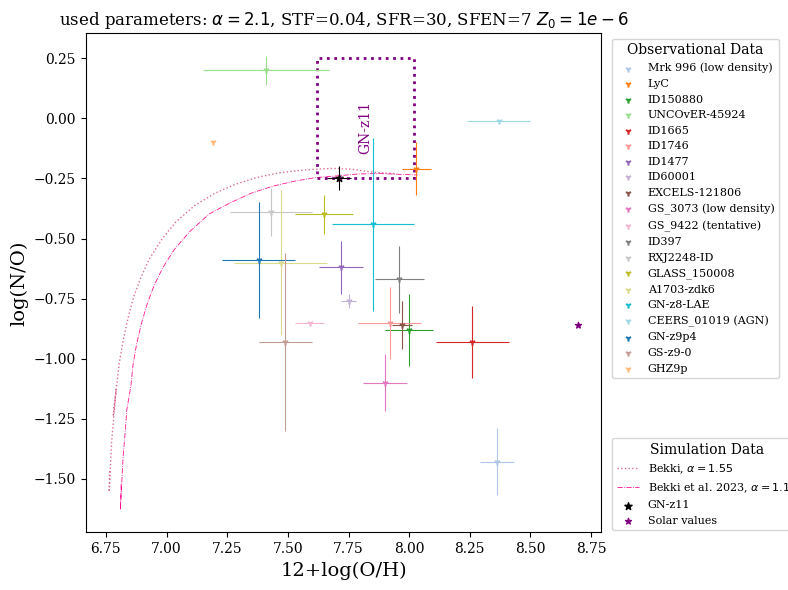

In [15]:
file_paths = glob.glob("./simulation_results_from_galaxy_evol/solution/imfKroupaSTF0.04alpha2.1Log_SFR1.3SFEN30SFE0.0095Z_0-4.15infall0.01/chemical_and_SN_evolution.txt")
#file_paths += glob.glob("./simulation_results_from_galaxy_evol/20250731/imfKroupaSTF0.04alpha2.35Log_SFR1.4SFEN10SFE0.0005Z_0-4.15infall*/chemical_and_SN_evolution.txt")
file_paths.sort()
print(file_paths)
labels = ['infall = 0.001', 'infall = 0.01', 'infall=0.1']
plot_NO_OH_comparison(
    file_paths,
    labels=labels,
    index_x=1,
    index_y=300,
    title='used parameters: $\\alpha=2.1$, STF=0.04, SFR=30, SFEN=7 $Z_0=1e-6$',
    filename='./figs/galevo/reproduction_of_bekki_alpha2-1_SNia_ON_colour_code.png',
    evolution_track_difference=None,
)

['./simulation_results_from_galaxy_evol/20250826/imfKroupaSTF0.04alpha2.1Log_SFR1.3SFEN15SFE0.012Z_0-4.15infall0.008/chemical_and_SN_evolution.txt']


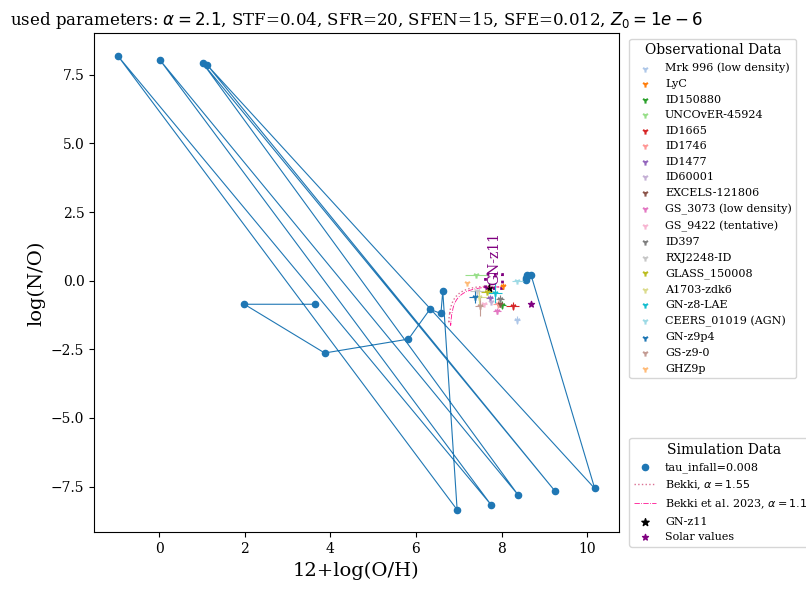

In [16]:
file_paths = glob.glob("./simulation_results_from_galaxy_evol/solution/imfKroupaSTF0.04alpha2.1Log_SFR1.3SFEN15SFE0.012Z_0-4.15infall0.008/chemical_and_SN_evolution.txt")
file_paths = glob.glob("./simulation_results_from_galaxy_evol/20250826/imfKroupaSTF0.04alpha2.1Log_SFR1.3SFEN15SFE0.012Z_0-4.15infall0.008/chemical_and_SN_evolution.txt")
print(file_paths)
labels = ['tau_infall=0.008']
plot_NO_OH_comparison(
    file_paths,
    labels=labels,
    index_x=0,
    index_y=20,
    title='used parameters: $\\alpha=2.1$, STF=0.04, SFR=20, SFEN=15, SFE=0.012, $Z_0=1e-6$',
    filename='./figs/galevo/reproduction_of_bekki_alpha2-1_SNia_ON_steller-upper-mass-bound150.png',
    evolution_track_difference=None,
)

# steller upper mass bound 150 Msun (changing steller_upper_mass_bound has a very little effect)

['./simulation_results_from_galaxy_evol/20250813/imfKroupaSTF0.04alpha2.1Log_SFR1.3SFEN15SFE0.004Z_0-4.15infall0.08/chemical_and_SN_evolution.txt']


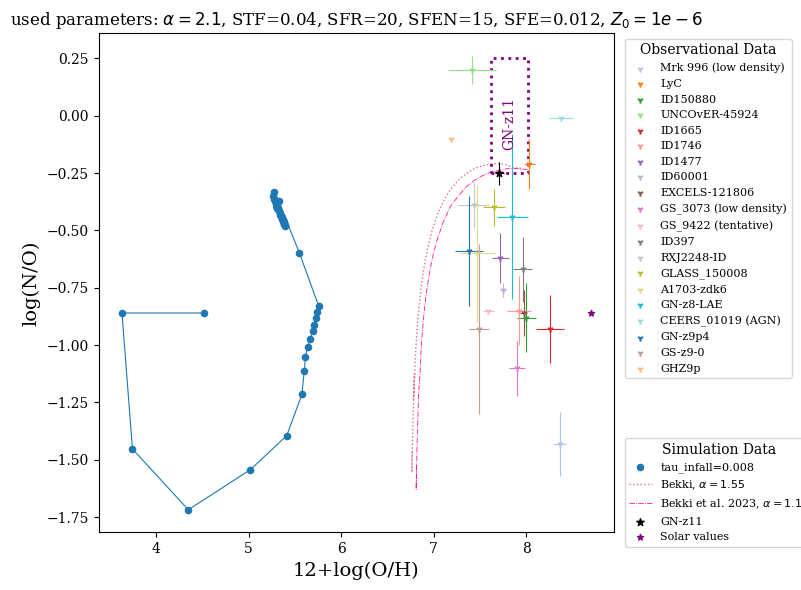

In [17]:
file_paths = glob.glob("./simulation_results_from_galaxy_evol/20250813/imfKroupaSTF0.04alpha2.1Log_SFR1.3SFEN15SFE0.004Z_0-4.15infall0.08/chemical_and_SN_evolution.txt")
print(file_paths)
labels = ['tau_infall=0.008']
plot_NO_OH_comparison(
    file_paths,
    labels=labels,
    index_x=0,
    index_y=50,
    title='used parameters: $\\alpha=2.1$, STF=0.04, SFR=20, SFEN=15, SFE=0.012, $Z_0=1e-6$',
    filename='./figs/galevo/reproduction_of_bekki_alpha2-1_SNia_ON_steller-upper-mass-bound150.png',
    evolution_track_difference=None,
)

['./simulation_results_from_galaxy_evol/20250826/imfKroupaSTF0.04alpha2.1Log_SFR1.3SFEN15SFE0.0012Z_0-4.15infall0.008/chemical_and_SN_evolution.txt']


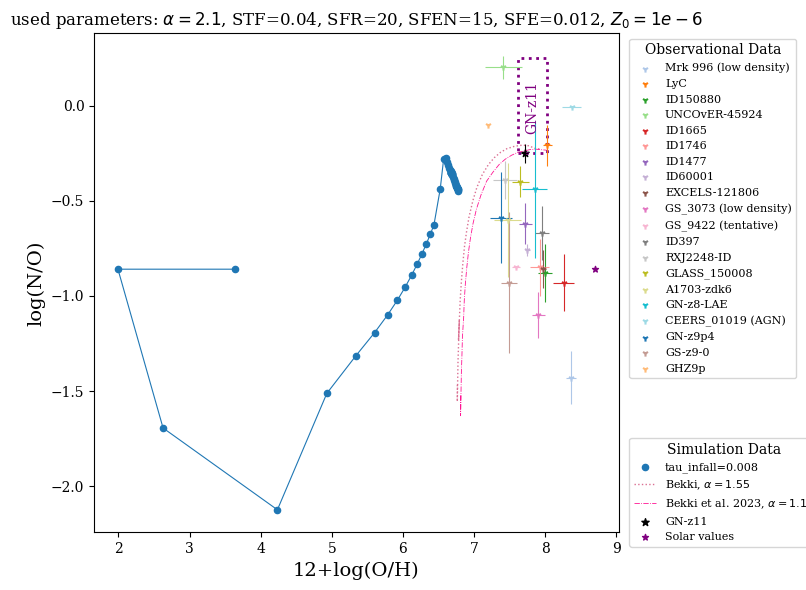

In [18]:
file_paths = glob.glob("./simulation_results_from_galaxy_evol/20250826/imfKroupaSTF0.04alpha2.1Log_SFR1.3SFEN15SFE0.0012Z_0-4.15infall0.008/chemical_and_SN_evolution.txt")
print(file_paths)
labels = ['tau_infall=0.008']
plot_NO_OH_comparison(
    file_paths,
    labels=labels,
    index_x=0,
    index_y=50,
    title='used parameters: $\\alpha=2.1$, STF=0.04, SFR=20, SFEN=15, SFE=0.012, $Z_0=1e-6$',
    filename='./figs/galevo/reproduction_of_bekki_alpha2-1_SNia_ON_steller-upper-mass-bound150.png',
    evolution_track_difference=None,
)

['./simulation_results_from_galaxy_evol/solution/R300 yields/imfKroupaSTF0.04alpha2.1Log_SFR1.3SFEN15SFE0.0072Z_0-4.15infall0.008/chemical_and_SN_evolution.txt']


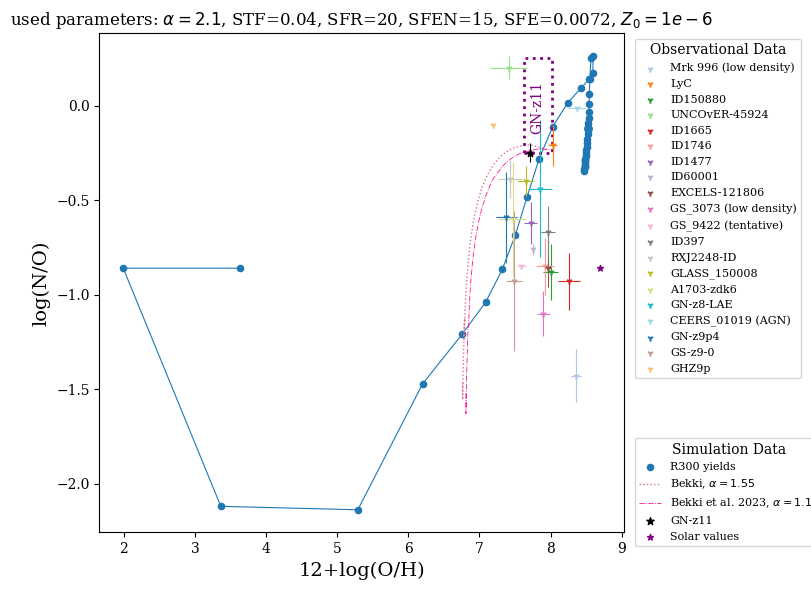

In [19]:
file_paths = glob.glob("./simulation_results_from_galaxy_evol/solution/R300 yields/imfKroupaSTF0.04alpha2.1Log_SFR1.3SFEN15SFE0.0072Z_0-4.15infall0.008/chemical_and_SN_evolution.txt")
file_paths += glob.glob("./simulation_results_from_galaxy_evol/solution/correct agb/imfKroupaSTF0.04alpha2.1Log_SFR1.3SFEN15SFE0.0072Z_0-4.15infall0.008/chemical_and_SN_evolution.txt")
print(file_paths)
labels = ['R300 yields', 'R300 with super agb']
plot_NO_OH_comparison(
    file_paths,
    labels=labels,
    index_x=0,
    index_y=50,
    title='used parameters: $\\alpha=2.1$, STF=0.04, SFR=20, SFEN=15, SFE=0.0072, $Z_0=1e-6$',
    filename='./figs/galevo/reproduction_of_bekki_alpha2-1_SNia_ON_steller-upper-mass-bound150.png',
    evolution_track_difference=None,
)
#outflow=100

['./simulation_results_from_galaxy_evol/solution/correct agb/imfKroupaSTF0.04alpha2.1Log_SFR1.3SFEN15SFE0.0062Z_0-4.15infall0.008/chemical_and_SN_evolution.txt']


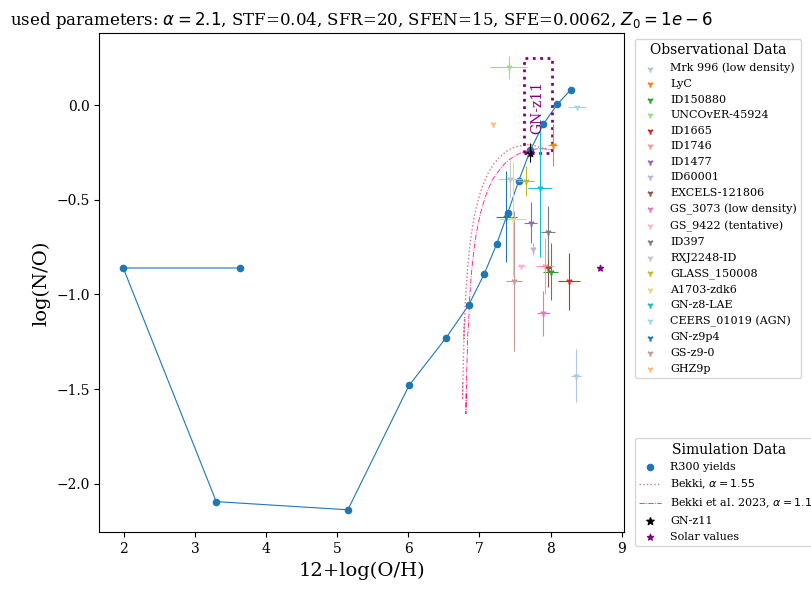

In [20]:
file_paths = glob.glob("./simulation_results_from_galaxy_evol/solution/correct agb/imfKroupaSTF0.04alpha2.1Log_SFR1.3SFEN15SFE0.0062Z_0-4.15infall0.008/chemical_and_SN_evolution.txt")
print(file_paths)
plot_NO_OH_comparison(
    file_paths,
    labels=labels,
    index_x=0,
    index_y=15,
    title='used parameters: $\\alpha=2.1$, STF=0.04, SFR=20, SFEN=15, SFE=0.0062, $Z_0=1e-6$',
    filename='./figs/galevo/reproduction_of_bekki_alpha2-1_steller-upper-mass-bound100.png',
    evolution_track_difference=None,
)

#outflow=100

Comparison plots

['./simulation_results_from_galaxy_evol/20250912/imfKroupaSTF0.04alpha2.1Log_SFR1.3SFEN15SFE0.0062Z_0-4.15infall0.0008/chemical_and_SN_evolution.txt', './simulation_results_from_galaxy_evol/20250912/imfKroupaSTF0.04alpha2.1Log_SFR1.3SFEN15SFE0.0062Z_0-4.15infall0.08/chemical_and_SN_evolution.txt', './simulation_results_from_galaxy_evol/20250912/imfKroupaSTF0.04alpha2.1Log_SFR1.3SFEN15SFE0.0062Z_0-4.15infall0.008/chemical_and_SN_evolution.txt']


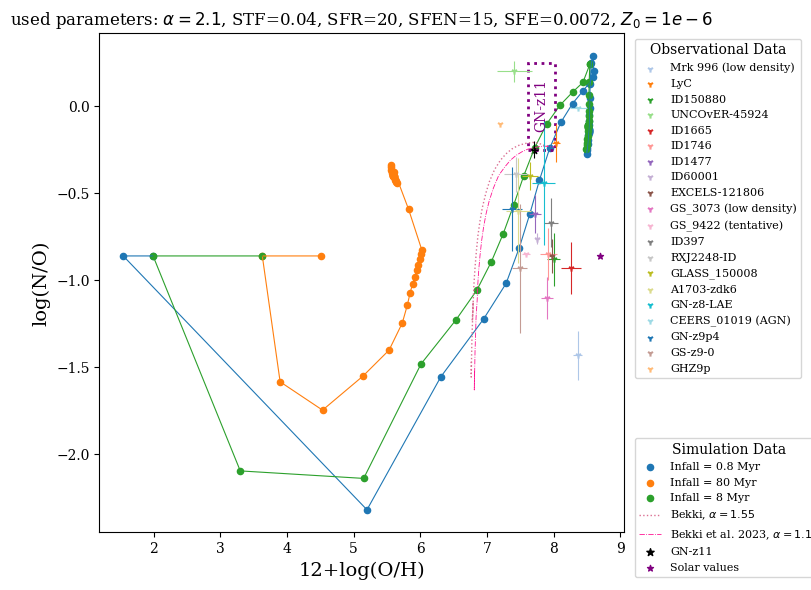

In [21]:
file_paths = glob.glob("./simulation_results_from_galaxy_evol/20250912/imfKroupaSTF0.04alpha2.1Log_SFR1.3SFEN15SFE0.0062Z_0-4.15infall*/chemical_and_SN_evolution.txt")
#file_paths += glob.glob("./simulation_results_from_galaxy_evol/solution/correct agb/imfKroupaSTF0.04alpha2.1Log_SFR1.3SFEN100SFE0.0072Z_0-4.15infall0.008/chemical_and_SN_evolution.txt")
print(file_paths)
labels = ['Infall = 0.8 Myr', 'Infall = 80 Myr', 'Infall = 8 Myr']
plot_NO_OH_comparison(
    file_paths,
    labels=labels,
    index_x=0,
    index_y=40,
    title='used parameters: $\\alpha=2.1$, STF=0.04, SFR=20, SFEN=15, SFE=0.0072, $Z_0=1e-6$',
    filename='./figs/galevo/comparison_plots_with_diff_infalltimescale.png',
    evolution_track_difference=None,
)

['./simulation_results_from_galaxy_evol/20250912/imfKroupaSTF0.04alpha1.5Log_SFR1.3SFEN15SFE0.0062Z_0-4.15infall0.008/chemical_and_SN_evolution.txt', './simulation_results_from_galaxy_evol/20250912/imfKroupaSTF0.04alpha1.7Log_SFR1.3SFEN15SFE0.0062Z_0-4.15infall0.008/chemical_and_SN_evolution.txt', './simulation_results_from_galaxy_evol/20250912/imfKroupaSTF0.04alpha2.1Log_SFR1.3SFEN15SFE0.0062Z_0-4.15infall0.008/chemical_and_SN_evolution.txt', './simulation_results_from_galaxy_evol/20250912/imfKroupaSTF0.04alpha2.3Log_SFR1.3SFEN15SFE0.0062Z_0-4.15infall0.008/chemical_and_SN_evolution.txt', './simulation_results_from_galaxy_evol/20250912/imfKroupaSTF0.04alpha2.7Log_SFR1.3SFEN15SFE0.0062Z_0-4.15infall0.008/chemical_and_SN_evolution.txt']


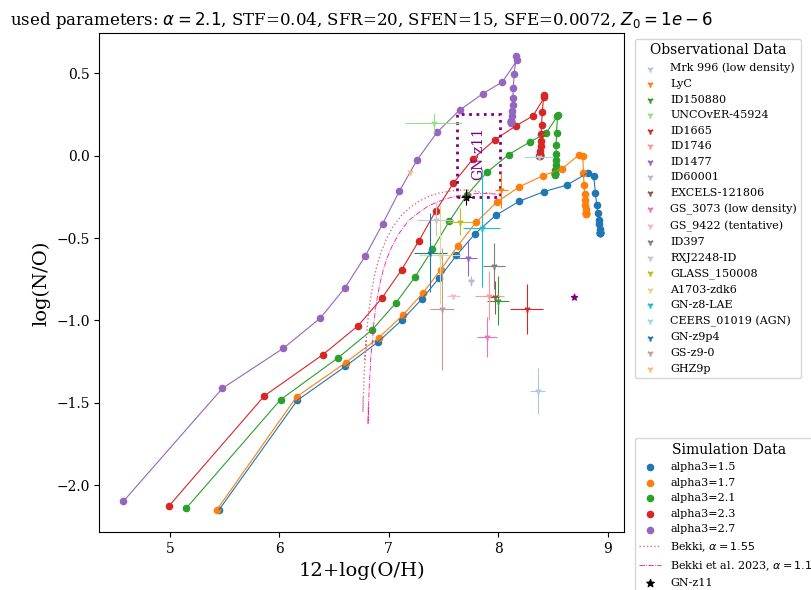

In [22]:
file_paths = glob.glob("./simulation_results_from_galaxy_evol/20250912/imfKroupaSTF0.04alpha*Log_SFR1.3SFEN15SFE0.0062Z_0-4.15infall0.008/chemical_and_SN_evolution.txt")
#file_paths += glob.glob("./simulation_results_from_galaxy_evol/solution/correct agb/imfKroupaSTF0.04alpha2.1Log_SFR1.3SFEN100SFE0.0072Z_0-4.15infall0.008/chemical_and_SN_evolution.txt")
file_paths.sort()
print(file_paths)
labels = ['alpha3=1.5', 'alpha3=1.7', 'alpha3=2.1', 'alpha3=2.3', 'alpha3=2.7']
plot_NO_OH_comparison(
    file_paths,
    labels=labels,
    index_x=3,
    index_y=30,
    title='used parameters: $\\alpha=2.1$, STF=0.04, SFR=20, SFEN=15, SFE=0.0072, $Z_0=1e-6$',
    filename='./figs/galevo/comparison_plots_with_diff_alpha3.png',
    evolution_track_difference=None,
)

['./simulation_results_from_galaxy_evol/20250915/alpha=1.5/imfKroupaSTF0.04alpha1.5Log_SFR1.3SFEN15SFE0.0092Z_0-4.15infall0.005/chemical_and_SN_evolution.txt', './simulation_results_from_galaxy_evol/20250915/alpha=1.5/imfKroupaSTF0.04alpha1.5Log_SFR1.3SFEN15SFE0.0092Z_0-4.15infall0.008/chemical_and_SN_evolution.txt', './simulation_results_from_galaxy_evol/20250915/alpha=1.5/imfKroupaSTF0.04alpha1.5Log_SFR1.3SFEN15SFE0.0092Z_0-4.15infall0.011/chemical_and_SN_evolution.txt']


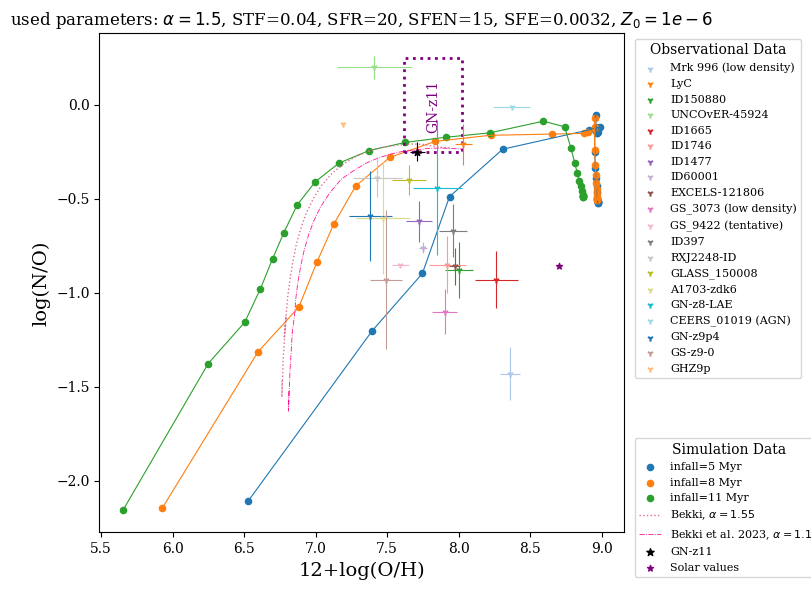

In [23]:
file_paths = glob.glob("./simulation_results_from_galaxy_evol/20250915/alpha=1.5/imfKroupaSTF0.04alpha1.5Log_SFR1.3SFEN15SFE0.0092Z_0-4.15infall*/chemical_and_SN_evolution.txt")
#file_paths += glob.glob("./simulation_results_from_galaxy_evol/solution/correct agb/imfKroupaSTF0.04alpha2.1Log_SFR1.3SFEN100SFE0.0072Z_0-4.15infall0.008/chemical_and_SN_evolution.txt")
file_paths.sort()
print(file_paths)
labels = ['infall=5 Myr', 'infall=8 Myr', 'infall=11 Myr']
plot_NO_OH_comparison(
    file_paths,
    labels=labels,
    index_x=3,
    index_y=30,
    title='used parameters: $\\alpha=1.5$, STF=0.04, SFR=20, SFEN=15, SFE=0.0032, $Z_0=1e-6$',
    filename='./figs/galevo/comparison_plots_with_diff_alpha3.png',
    evolution_track_difference=None,
)

#outflow=150

['./simulation_results_from_galaxy_evol/20250915/alpha=1.5/imfKroupaSTF0.04alpha1.5Log_SFR1.3SFEN15SFE0.0032Z_0-4.15infall0.011/chemical_and_SN_evolution.txt', './simulation_results_from_galaxy_evol/20250915/alpha=1.5/imfKroupaSTF0.04alpha1.5Log_SFR1.3SFEN15SFE0.0062Z_0-4.15infall0.011/chemical_and_SN_evolution.txt', './simulation_results_from_galaxy_evol/20250915/alpha=1.5/imfKroupaSTF0.04alpha1.5Log_SFR1.3SFEN15SFE0.0092Z_0-4.15infall0.011/chemical_and_SN_evolution.txt']


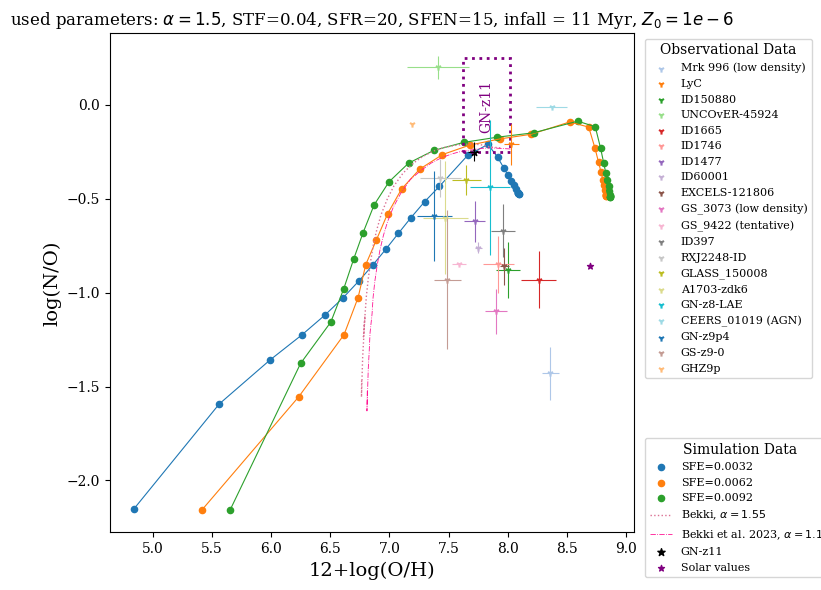

In [24]:
file_paths = glob.glob("./simulation_results_from_galaxy_evol/20250915/alpha=1.5/imfKroupaSTF0.04alpha1.5Log_SFR1.3SFEN15SFE*Z_0-4.15infall0.011/chemical_and_SN_evolution.txt")
#file_paths += glob.glob("./simulation_results_from_galaxy_evol/solution/correct agb/imfKroupaSTF0.04alpha2.1Log_SFR1.3SFEN100SFE0.0072Z_0-4.15infall0.008/chemical_and_SN_evolution.txt")
file_paths.sort()
print(file_paths)
labels = ['SFE=0.0032', 'SFE=0.0062', 'SFE=0.0092']
plot_NO_OH_comparison(
    file_paths,
    labels=labels,
    index_x=3,
    index_y=30,
    title='used parameters: $\\alpha=1.5$, STF=0.04, SFR=20, SFEN=15, infall = 11 Myr, $Z_0=1e-6$',
    filename='./figs/galevo/solution_a1.5_infall-11Myr.png',
    evolution_track_difference=None,
)

#outflow=150

['./simulation_results_from_galaxy_evol/20250916/imfKroupaSTF0.04alpha1.5Log_SFR1.3SFEN15SFE0.0048Z_0-4.15infall0.011/chemical_and_SN_evolution.txt']


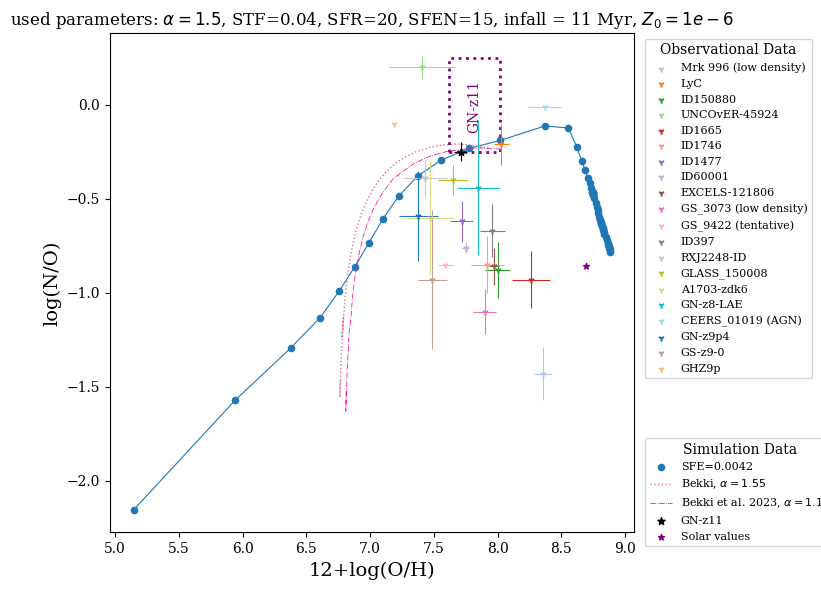

In [25]:
file_paths = glob.glob("./simulation_results_from_galaxy_evol/20250916/imfKroupaSTF0.04alpha1.5Log_SFR1.3SFEN15SFE0.0048Z_0-4.15infall0.011/chemical_and_SN_evolution.txt")
#file_paths += glob.glob("./simulation_results_from_galaxy_evol/solution/correct agb/imfKroupaSTF0.04alpha2.1Log_SFR1.3SFEN100SFE0.0072Z_0-4.15infall0.008/chemical_and_SN_evolution.txt")
file_paths.sort()
print(file_paths)
labels = ['SFE=0.0042', 'SFE=0.0048', 'SFE=0.0052', 'SFE=0.0062', 'SFE=0.0072']
plot_NO_OH_comparison(
    file_paths,
    labels=labels,
    index_x=3,
    index_y=150,
    title='used parameters: $\\alpha=1.5$, STF=0.04, SFR=20, SFEN=15, infall = 11 Myr, $Z_0=1e-6$',
    filename='./figs/galevo/solution_a1.5_infall-11Myr.png',
    evolution_track_difference=None,
)

#outflow=150

['./simulation_results_from_galaxy_evol/20250915/alpha=2.7/imfKroupaSTF0.04alpha2.7Log_SFR1.3SFEN15SFE0.0071Z_0-4.15infall0.0008/chemical_and_SN_evolution.txt']


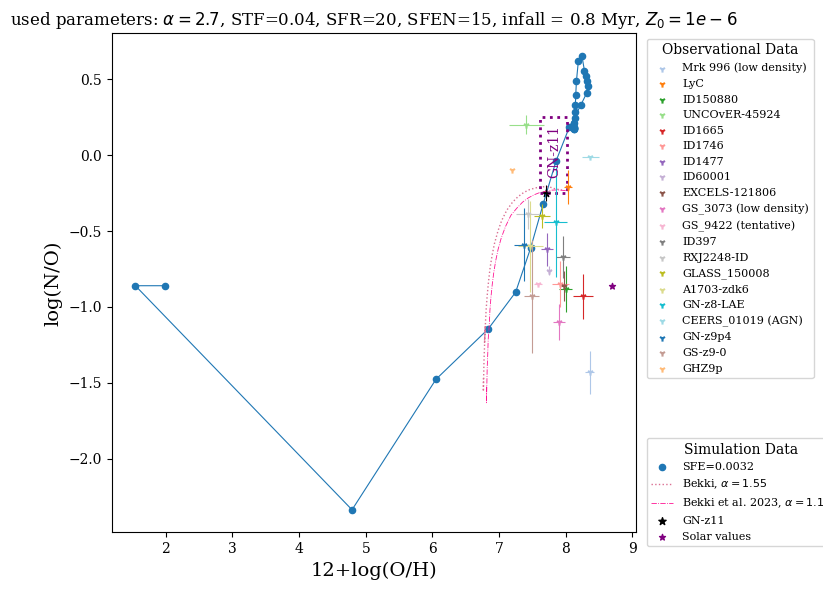

In [26]:
file_paths = glob.glob("./simulation_results_from_galaxy_evol/20250915/alpha=2.7/imfKroupaSTF0.04alpha2.7Log_SFR1.3SFEN15SFE0.0071Z_0-4.15infall*/chemical_and_SN_evolution.txt")
#file_paths += glob.glob("./simulation_results_from_galaxy_evol/solution/correct agb/imfKroupaSTF0.04alpha2.1Log_SFR1.3SFEN100SFE0.0072Z_0-4.15infall0.008/chemical_and_SN_evolution.txt")
file_paths.sort()
print(file_paths)
labels = ['SFE=0.0032', 'SFE=0.0062', 'SFE=0.0092']
plot_NO_OH_comparison(
    file_paths,
    labels=labels,
    index_x=0,
    index_y=30,
    title='used parameters: $\\alpha=2.7$, STF=0.04, SFR=20, SFEN=15, infall = 0.8 Myr, $Z_0=1e-6$',
    filename='./figs/galevo/solution_a2.7_infall-08Myr.png',
    evolution_track_difference=None,
)

#outflow=100

['./simulation_results_from_galaxy_evol/20250916/imfKroupaSTF0.04alpha2.3Log_SFR1.3SFEN15SFE0.0042Z_0-4.15infall0.0008/chemical_and_SN_evolution.txt', './simulation_results_from_galaxy_evol/20250916/imfKroupaSTF0.04alpha2.3Log_SFR1.3SFEN15SFE0.0052Z_0-4.15infall0.0008/chemical_and_SN_evolution.txt', './simulation_results_from_galaxy_evol/20250916/imfKroupaSTF0.04alpha2.3Log_SFR1.3SFEN15SFE0.0061Z_0-4.15infall0.0008/chemical_and_SN_evolution.txt', './simulation_results_from_galaxy_evol/20250916/imfKroupaSTF0.04alpha2.3Log_SFR1.3SFEN15SFE0.0062Z_0-4.15infall0.0008/chemical_and_SN_evolution.txt', './simulation_results_from_galaxy_evol/20250916/imfKroupaSTF0.04alpha2.3Log_SFR1.3SFEN15SFE0.006Z_0-4.15infall0.0008/chemical_and_SN_evolution.txt', './simulation_results_from_galaxy_evol/20250916/imfKroupaSTF0.04alpha2.3Log_SFR1.3SFEN15SFE0.0072Z_0-4.15infall0.0008/chemical_and_SN_evolution.txt']


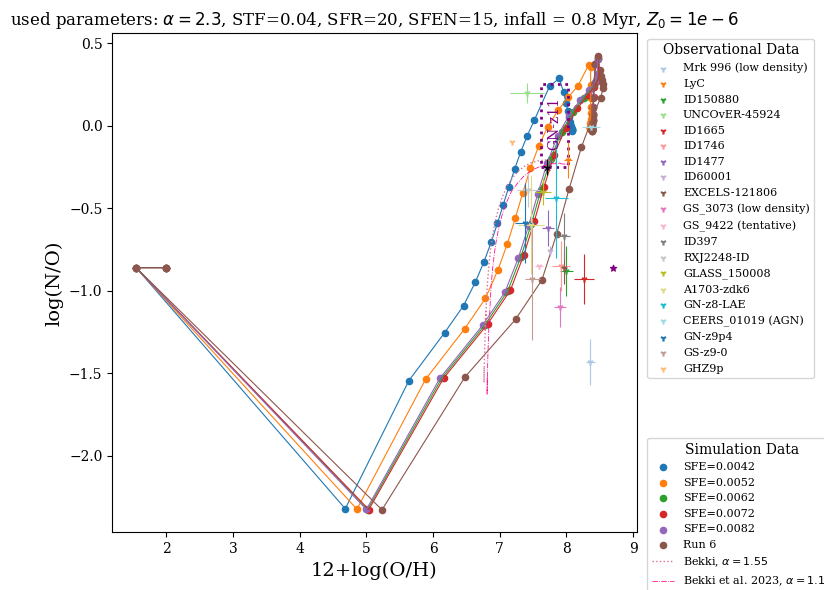

In [27]:
file_paths = glob.glob("./simulation_results_from_galaxy_evol/20250916/imfKroupaSTF0.04alpha2.3Log_SFR1.3SFEN15SFE*Z_0-4.15infall0.0008/chemical_and_SN_evolution.txt")
#file_paths += glob.glob("./simulation_results_from_galaxy_evol/solution/correct agb/imfKroupaSTF0.04alpha2.1Log_SFR1.3SFEN100SFE0.0072Z_0-4.15infall0.008/chemical_and_SN_evolution.txt")
file_paths.sort()
print(file_paths)
labels = ['SFE=0.0042', 'SFE=0.0052', 'SFE=0.0062', 'SFE=0.0072', 'SFE=0.0082']
plot_NO_OH_comparison(
    file_paths,
    labels=labels,
    index_x=0,
    index_y=30,
    title='used parameters: $\\alpha=2.3$, STF=0.04, SFR=20, SFEN=15, infall = 0.8 Myr, $Z_0=1e-6$',
    filename='./figs/galevo/solution_a2.3_infall-08Myr.png',
    evolution_track_difference=None,
)

#outflow=100, interesting difference between 0.8 Myr and 8 Myr infall timescale

['./simulation_results_from_galaxy_evol/20250916/imfKroupaSTF0.04alpha2.3Log_SFR1.3SFEN15SFE0.0061Z_0-4.15infall0.0008/chemical_and_SN_evolution.txt']


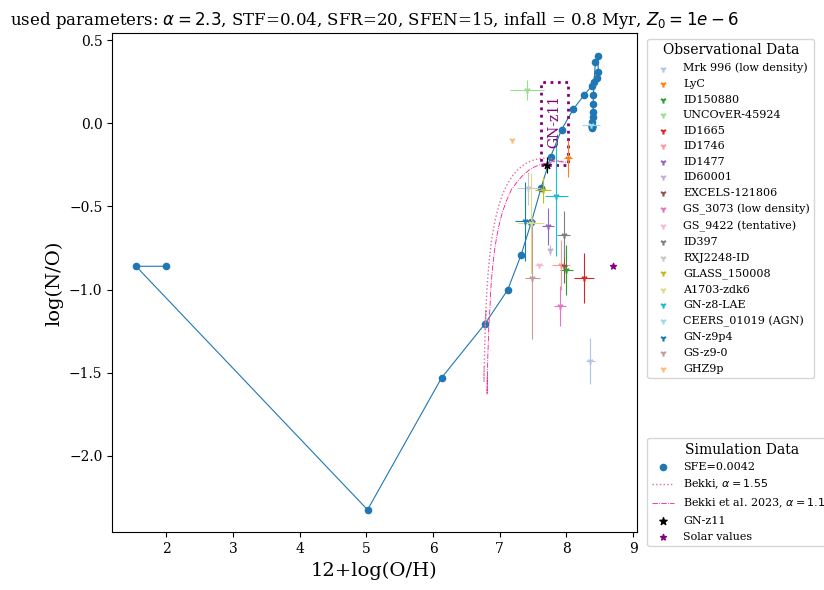

In [28]:
file_paths = glob.glob("./simulation_results_from_galaxy_evol/20250916/imfKroupaSTF0.04alpha2.3Log_SFR1.3SFEN15SFE0.0061Z_0-4.15infall0.0008/chemical_and_SN_evolution.txt")
#file_paths += glob.glob("./simulation_results_from_galaxy_evol/solution/correct agb/imfKroupaSTF0.04alpha2.1Log_SFR1.3SFEN100SFE0.0072Z_0-4.15infall0.008/chemical_and_SN_evolution.txt")
file_paths.sort()
print(file_paths)
labels = ['SFE=0.0042', 'SFE=0.0052', 'SFE=0.0062', 'SFE=0.0072', 'SFE=0.0082']
plot_NO_OH_comparison(
    file_paths,
    labels=labels,
    index_x=0,
    index_y=30,
    title='used parameters: $\\alpha=2.3$, STF=0.04, SFR=20, SFEN=15, infall = 0.8 Myr, $Z_0=1e-6$',
    filename='./figs/galevo/solution_a2.3_infall-08Myr.png',
    evolution_track_difference=None,
)

#outflow=100

['./simulation_results_from_galaxy_evol/20250915/alpha=2.7/imfKroupaSTF0.04alpha2.7Log_SFR1.3SFEN15SFE0.0071Z_0-4.15infall0.0008/chemical_and_SN_evolution.txt']


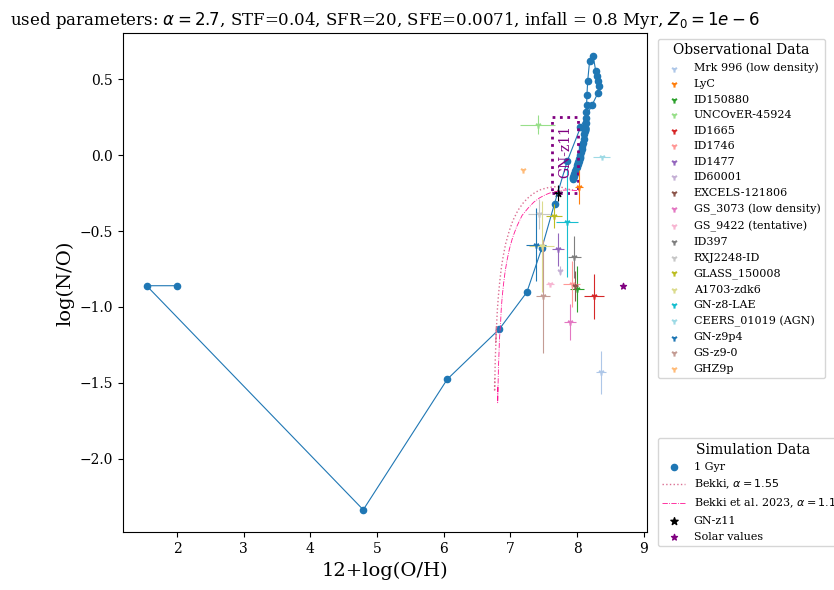

In [29]:
file_paths = glob.glob("./simulation_results_from_galaxy_evol/20250915/alpha=2.7/1Gyr/imfKroupaSTF0.04alpha2.7Log_SFR1.3SFEN100SFE0.0071Z_0-4.15infall0.0008/chemical_and_SN_evolution.txt")
file_paths += glob.glob("./simulation_results_from_galaxy_evol/20250915/alpha=2.7/imfKroupaSTF0.04alpha2.7Log_SFR1.3SFEN15SFE0.0071Z_0-4.15infall0.0008/chemical_and_SN_evolution.txt")
print(file_paths)
labels = ['1 Gyr', '150 Myr']
plot_NO_OH_comparison(
    file_paths,
    labels=labels,
    index_x=0,
    index_y=300,
    title='used parameters: $\\alpha=2.7$, STF=0.04, SFR=20, SFE=0.0071, infall = 0.8 Myr, $Z_0=1e-6$',
    filename='./figs/galevo/solution_a2.7_infall-08Myr.png',
    evolution_track_difference=None,
)

#outflow=100

['./simulation_results_from_galaxy_evol/20250916/imfKroupaSTF0.04alpha3.0Log_SFR1.3SFEN15SFE0.0085Z_0-4.15infall0.0008/chemical_and_SN_evolution.txt']
['SFE=0.0021', 'SFE=0.0041', 'SFE=0.0061', 'SFE=0.0081', 'SFE=0.0101']


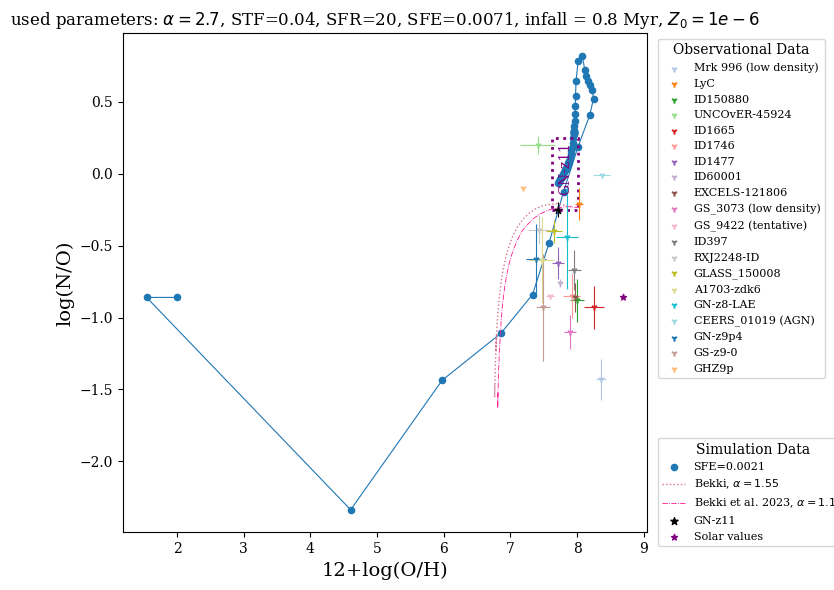

In [30]:
file_paths = glob.glob("./simulation_results_from_galaxy_evol/20250916/imfKroupaSTF0.04alpha3.0Log_SFR1.3SFEN15SFE0.0085Z_0-4.15infall0.0008/chemical_and_SN_evolution.txt")
#file_paths += glob.glob("./simulation_results_from_galaxy_evol/20250915/alpha=2.7/imfKroupaSTF0.04alpha2.7Log_SFR1.3SFEN15SFE0.0071Z_0-4.15infall0.0008/chemical_and_SN_evolution.txt")
file_paths.sort()
print(file_paths)
labels = ['SFE=0.0081', 'SFE=0.0021', 'SFE=0.0061', 'SFE=0.0101', 'SFE=0.0041',]
labels.sort()
print(labels)
plot_NO_OH_comparison(
    file_paths,
    labels=labels,
    index_x=0,
    index_y=300,
    title='used parameters: $\\alpha=2.7$, STF=0.04, SFR=20, SFE=0.0071, infall = 0.8 Myr, $Z_0=1e-6$',
    filename='./figs/galevo/solution_a2.7_infall-08Myr.png',
    evolution_track_difference=None,
)

#outflow=50, comparison of different infall timescales

Solutions

['./simulation_results_from_galaxy_evol/final_results/imfKroupaSTF0.04alpha1.5Log_SFR1.3SFEN100SFE0.0048Z_0-4.15infall0.011/chemical_and_SN_evolution.txt', './simulation_results_from_galaxy_evol/final_results/imfKroupaSTF0.04alpha2.1Log_SFR1.3SFEN100SFE0.0062Z_0-4.15infall0.008/chemical_and_SN_evolution.txt', './simulation_results_from_galaxy_evol/final_results/imfKroupaSTF0.04alpha2.3Log_SFR1.3SFEN100SFE0.0061Z_0-4.15infall0.0008/chemical_and_SN_evolution.txt', './simulation_results_from_galaxy_evol/final_results/imfKroupaSTF0.04alpha2.7Log_SFR1.3SFEN100SFE0.0071Z_0-4.15infall0.0008/chemical_and_SN_evolution.txt', './simulation_results_from_galaxy_evol/final_results/imfKroupaSTF0.04alpha3.0Log_SFR1.3SFEN100SFE0.0085Z_0-4.15infall0.0008/chemical_and_SN_evolution.txt']


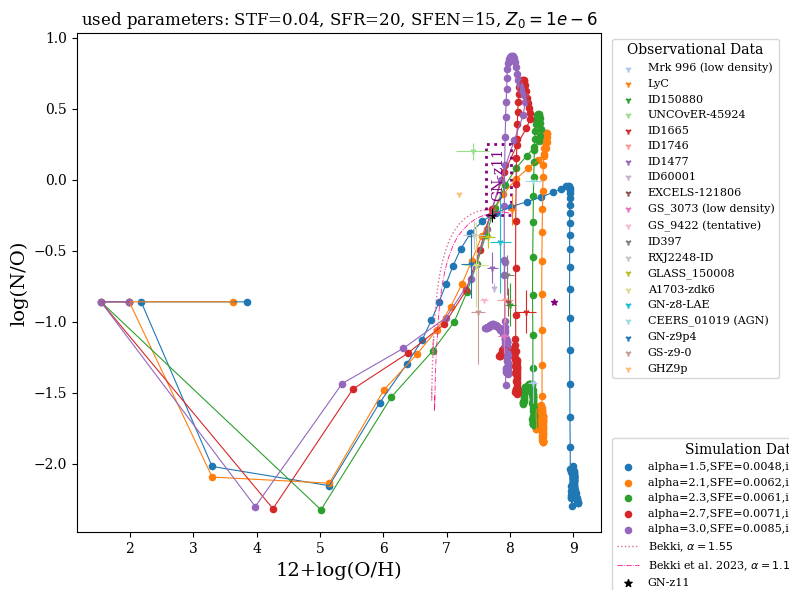

In [31]:
file_paths = glob.glob("./simulation_results_from_galaxy_evol/final_results/imfKroupaSTF0.04alpha2.7Log_SFR1.3SFEN100SFE0.0071Z_0-4.15infall*/chemical_and_SN_evolution.txt")
file_paths += glob.glob("./simulation_results_from_galaxy_evol/final_results/imfKroupaSTF0.04alpha1.5Log_SFR1.3SFEN100SFE0.0048Z_0-4.15infall0.011/chemical_and_SN_evolution.txt")
file_paths += glob.glob("./simulation_results_from_galaxy_evol/final_results/imfKroupaSTF0.04alpha2.1Log_SFR1.3SFEN100SFE0.0062Z_0-4.15infall0.008/chemical_and_SN_evolution.txt")
file_paths += glob.glob("./simulation_results_from_galaxy_evol/final_results/imfKroupaSTF0.04alpha2.3Log_SFR1.3SFEN100SFE0.0061Z_0-4.15infall0.0008/chemical_and_SN_evolution.txt")
file_paths += glob.glob("./simulation_results_from_galaxy_evol/final_results/imfKroupaSTF0.04alpha3.0Log_SFR1.3SFEN100SFE0.0085Z_0-4.15infall0.0008/chemical_and_SN_evolution.txt")
file_paths.sort()
print(file_paths)
labels = ['alpha=1.5,SFE=0.0048,infall=11 Myr', 'alpha=2.1,SFE=0.0062,infall=8 Myr', 'alpha=2.3,SFE=0.0061,infall=0.8 Myr', 'alpha=2.7,SFE=0.0071,infall=0.8 Myr', 'alpha=3.0,SFE=0.0085,infall=0.8 Myr']
plot_NO_OH_comparison(
    file_paths,
    labels=labels,
    index_x=0,
    index_y=400,
    title='used parameters: STF=0.04, SFR=20, SFEN=15, $Z_0=1e-6$',
    filename='./figs/galevo/comparison-plot_solutions_extended.png',
    evolution_track_difference=None,
)

#outflow=150, 100, 100, 100, 90

['./simulation_results_from_galaxy_evol/final_results/imfKroupaSTF0.02alpha3.0Log_SFR-0.3SFEN100SFE0.0085Z_0-4.15infall0.0008/chemical_and_SN_evolution.txt', './simulation_results_from_galaxy_evol/final_results/imfKroupaSTF0.04alpha2.1Log_SFR0.3SFEN100SFE0.0062Z_0-4.15infall0.008/chemical_and_SN_evolution.txt', './simulation_results_from_galaxy_evol/final_results/imfKroupaSTF0.04alpha2.3Log_SFR0.2SFEN100SFE0.0061Z_0-4.15infall0.0008/chemical_and_SN_evolution.txt']


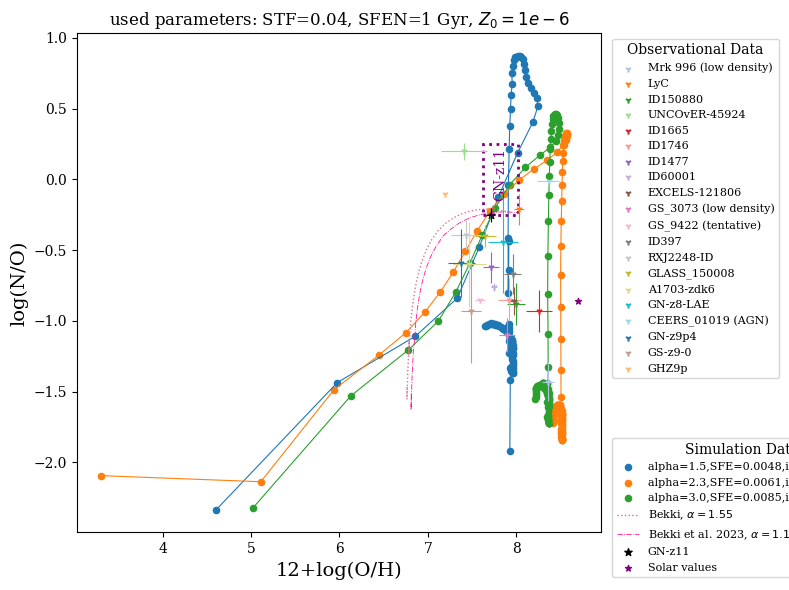

In [13]:
#file_paths = glob.glob("./simulation_results_from_galaxy_evol/final_results/imfKroupaSTF0.04alpha2.7Log_SFR1.3SFEN100SFE0.0071Z_0-4.15infall*/chemical_and_SN_evolution.txt")
#file_paths = glob.glob("./simulation_results_from_galaxy_evol/final_results/imfKroupaSTF0.04alpha1.5Log_SFR1.3SFEN100SFE0.0048Z_0-4.15infall0.011/chemical_and_SN_evolution.txt")
file_paths = glob.glob("./simulation_results_from_galaxy_evol/final_results/imfKroupaSTF0.04alpha2.1Log_SFR0.3SFEN100SFE0.0062Z_0-4.15infall0.008/chemical_and_SN_evolution.txt")
file_paths += glob.glob("./simulation_results_from_galaxy_evol/final_results/imfKroupaSTF0.04alpha2.3Log_SFR0.2SFEN100SFE0.0061Z_0-4.15infall0.0008/chemical_and_SN_evolution.txt")
file_paths += glob.glob("./simulation_results_from_galaxy_evol/final_results/imfKroupaSTF0.02alpha3.0Log_SFR-0.3SFEN100SFE0.0085Z_0-4.15infall0.0008/chemical_and_SN_evolution.txt")
file_paths.sort()
print(file_paths)
labels = ['alpha=1.5,SFE=0.0048,infall=11 Myr', 'alpha=2.3,SFE=0.0061,infall=0.8 Myr', 'alpha=3.0,SFE=0.0085,infall=0.8 Myr']
plot_NO_OH_comparison(
    file_paths,
    labels=labels,
    index_x=2,
    index_y=130,
    title='used parameters: STF=0.04, SFEN=1 Gyr, $Z_0=1e-6$',
    filename='./figs/galevo/comparison-plot_solutions.png',
    evolution_track_difference=None,
)

#outflow=150, 100, 100, 100, 90

Resolving too wide spread over oxygen compared to data 

['./simulation_results_from_galaxy_evol/20250918/imfKroupaSTF0.04alpha1.5Log_SFR2.0SFEN15SFE0.0021Z_0-4.15infall8e-05/chemical_and_SN_evolution.txt']
['SFE=0.0021,inf=0.08 Myr,outf=200', 'SFE=0.0048,inf=11 Myr,outf=150']


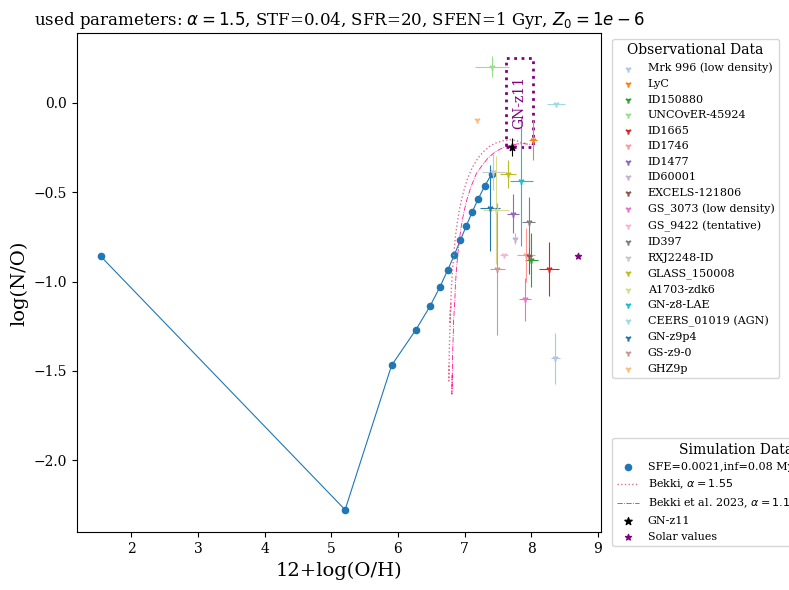

In [7]:
file_paths = glob.glob("./simulation_results_from_galaxy_evol/20250918/imfKroupaSTF0.04alpha1.5Log_SFR0.6SFEN100SFE0.0021Z_0-4.15infall8e-05/chemical_and_SN_evolution.txt")
file_paths += glob.glob("./simulation_results_from_galaxy_evol/20250918/imfKroupaSTF0.04alpha1.5Log_SFR2.0SFEN15SFE0.0021Z_0-4.15infall8e-05/chemical_and_SN_evolution.txt")
file_paths.sort()
print(file_paths)
labels = ['SFE=0.0021,inf=0.08 Myr,outf=200', 'SFE=0.0048,inf=11 Myr,outf=150']
labels.sort()
print(labels)
plot_NO_OH_comparison(
    file_paths,
    labels=labels,
    index_x=1,
    index_y=15,
    title='used parameters: $\\alpha=1.5$, STF=0.04, SFR=20, SFEN=1 Gyr, $Z_0=1e-6$',
    filename='./figs/galevo/playing.png',
    evolution_track_difference=None,
)

#outflow=50, comparison of different infall timescales